# Galaxy Luminosity Functions

##### Authors: V. Veselov

Description: This project designed to show Galaxies Luminosities. Explain possible uncertanties and approximation. Make sure that previuse research was done correctly and there is nothing left to improve or taken into considaration

#### Coordinator/Supervisor: Professor C. Keeton

Rutgers University 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import time 
import math
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import interp1d
import emcee
import corner
%matplotlib inline

In [2]:
#If you have LaTex on your PC/Notebook etc. use the following code. It may help you to prevent some issues
#This code does help you to unlock MikTex(LaTex for windows) the file manually
#Note that if you have different operating system you may need to use different code

import sys, os, math, tempfile, atexit, shutil
from joblib import Parallel, delayed

# Subprocess function

def subprocess_task():
    mpldir = tempfile.mkdtemp()
    atexit.register(shutil.rmtree, mpldir)
    umask = os.umask(0)
    os.umask(umask)
    os.chmod(mpldir, 0o777 & ~umask)
    os.environ['HOME'] = mpldir
    os.environ['MPLCONFIGDIR'] = mpldir
    import matplotlib
    class TexManager(matplotlib.texmanager.TexManager):
        texcache = os.path.join(mpldir, 'tex.cache')
    matplotlib.texmanager.TexManager = TexManager
    matplotlib.rcParams['ps.useafm'] = True
    matplotlib.rcParams['pdf.use14corefonts'] = True
    matplotlib.rcParams['text.usetex'] = True

    # From here on, safe to use matplotlib in parallel

# Main process function

def mainprocess_task(n_threads=32):
    with Parallel(n_jobs=n_threads) as parallel:
        parallel(delayed(subprocess_task)() for i in range(0,256))

In [3]:
#Let you set your font size
#For the sace of simplisite we keep it "normal"

plt.rcParams.update({'font.size':15,'text.usetex':True})

In [4]:
data1 = np.loadtxt('data1.txt', usecols = (2, 3, 4))
data2 = np.loadtxt('data2.txt')

When made the code faced some error which were not able solve with a help of group mate. So, I had to use other memeber method and use text file instead of my arrays. It looks like that when you use arrays in chisq it gives you an error 

<ErrorbarContainer object of 3 artists>

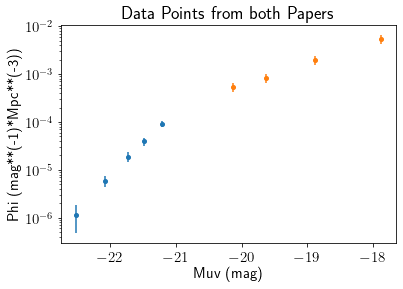

In [5]:
#Lets see how it will look on one graph

muv1 = data1[:,0]
phi1 = data1[:,1]
error1 = data1[:,2]

muv2 = data2[:,0]
phi2 = data2[:,1]
error2 = data2[:,2]

ax = plt.subplot()

plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.yscale('log')
plt.title('Data Points from both Papers')
plt.errorbar(muv1,phi1,error1, fmt = "o", ms = 4)
plt.errorbar(muv2,phi2,error2, fmt = "o", ms = 4)

##### Now, lets make two independent graphs for 2 data sets for ethier analysis and see "true" errorbar

In [6]:
#Lets make and array like if it was text document for further coding
#Set our data1 and data2 array

data1 = np.array([[-22.52,1.16e-6, 0.67e-6],[-22.08, 5.98e-6, 1.64e-6], [-21.74, 1.90e-5, 0.41e-5],[-21.49, 3.92e-5, 0.70e-5], [-21.22, 14e-5, 1.39e-5]])
data2 = np.array([[-20.13, 0.00054, 0.00012],[-19.63, 0.00083, 0.00018],[-18.88, 0.00197, 0.00041], [-17.88, 0.00535, 0.00117]])

In [7]:
#Allows you to check your data column

print(data1[:,0], data2[:,0])

[-22.52 -22.08 -21.74 -21.49 -21.22] [-20.13 -19.63 -18.88 -17.88]


In [8]:
#Set your parameters/symbols
mu_v_1=data1[:,0]
phi_1=data1[:,1]
error_1=data1[:,2]
mu_v_2=data2[:,0]
phi_2=data2[:,1]
error_2=data2[:,2]

Text(0.5, 1.0, 'Figure 2')

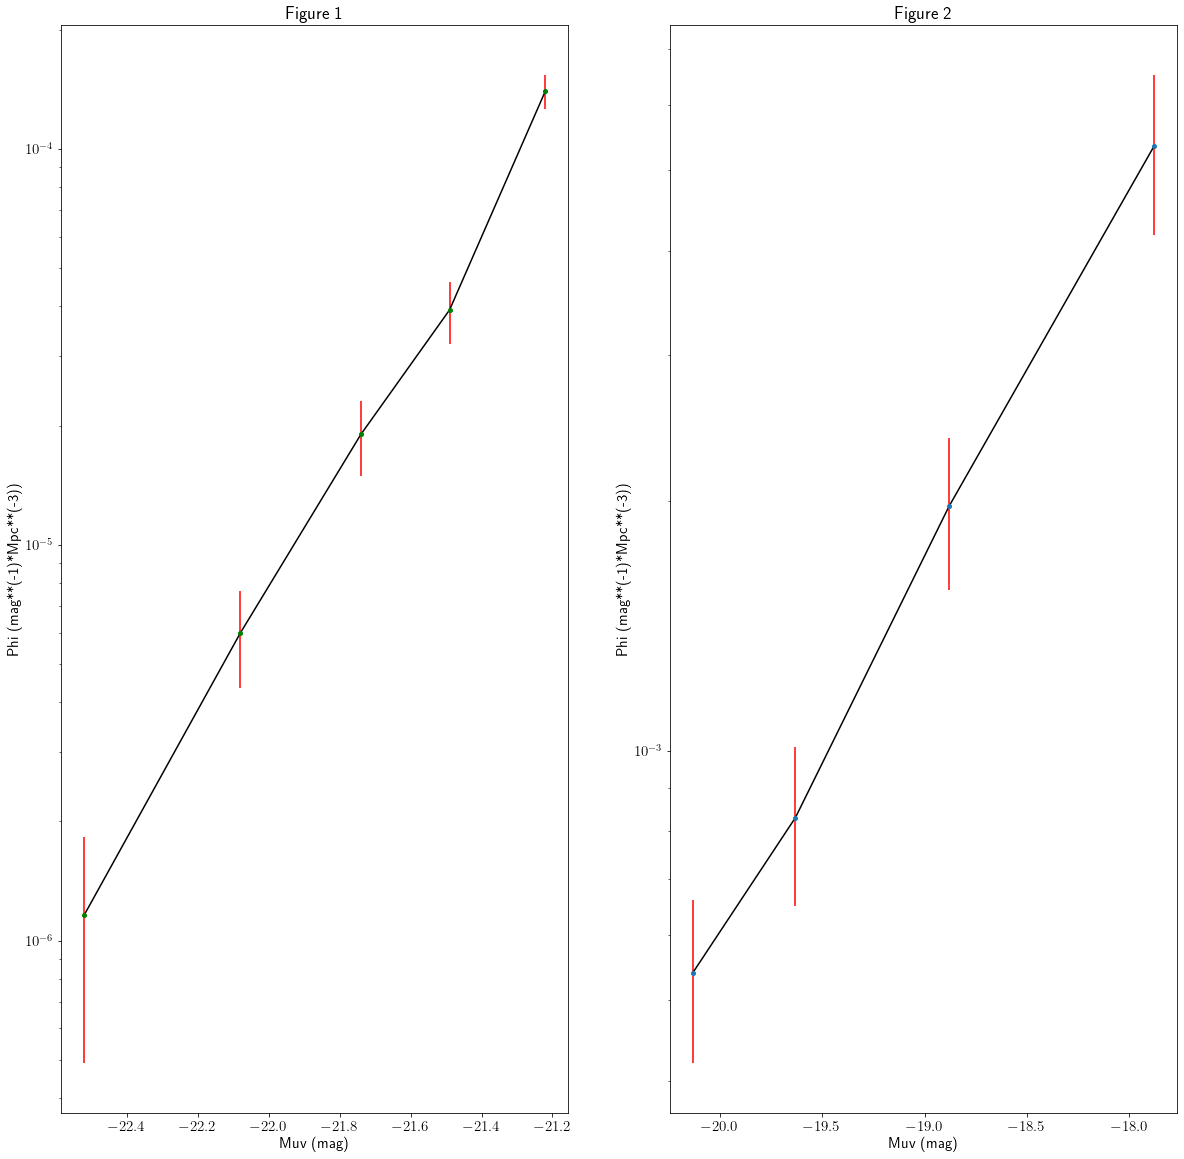

In [9]:
#Graph code
#As you can see we kept ax[0] and ax[1] separetlly
#Just in case if in some near future we/someone else would like to revise our project

f,ax=plt.subplots(1,2,figsize=(20,20)) #Set nubmer of sublots

ax[0].plot(mu_v_1, phi_1, color= 'black')
ax[0].set_yscale('log')      #Make the graph as function log(f)
ax[0].set_xlabel(r'Muv (mag)')  #label x-axes
ax[0].set_ylabel(r'Phi (mag**(-1)*Mpc**(-3))')     #label y-axes
data1.shape[1]               #It is very beneficial to making sure that data shape is 1
ax[0].errorbar(mu_v_1, phi_1, error_1, fmt="o", ms=4, color= 'g', ecolor='r') #set rerrorbar
ax[0].set_title(r'Figure 1') #Lable the title for each graph

ax[1].plot(mu_v_2, phi_2, color= 'black')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Muv (mag)')
ax[1].set_ylabel(r'Phi (mag**(-1)*Mpc**(-3))')
data2.shape[1]
ax[1].errorbar(mu_v_2, phi_2, error_2, fmt= "o", ms= 4, ecolor= 'r')
ax[1].set_title(r'Figure 2')



It seem to be quite impressive uncertanty

In [10]:
#Set parameters from the figure/book
alpha_test=-1.88
m_star_test=-20.77
Beta_test=-5.1
phi_star_test=5.7*10**-4

In [11]:
#Schechter

def Phi(M):
    return 0.4*math.log(10)*phi_star_test*(10**(-0.4*(M-m_star_test)))**(1+alpha_test)*math.exp(-10**(0.4*(M-m_star_test)))

In [12]:
#Find value baundery for low mu_v_1

Phi(-22.52)

0.0001041111861251691

In [13]:
#Find value baundery for high mu_v_1

Phi(-21.22)

0.00018828469405431553

In [14]:
#Find value for low mu_v_2

Phi(-20.13)

0.00014534158100317166

In [15]:
#Find value for high mu_v_2

Phi(-17.18)

1.355284940463395e-14

What I did from the above is I was trying to verify the result from on of the figures and almost got similar/identical results

In [16]:
#Schechter

def Phi_SF(M, phi_star,M_star,alpha):
    return 0.4*np.log(10)*phi_star*(10**(-0.4*(M-M_star)))**(1+alpha)*np.exp(-10**(-0.4*(M-M_star)))

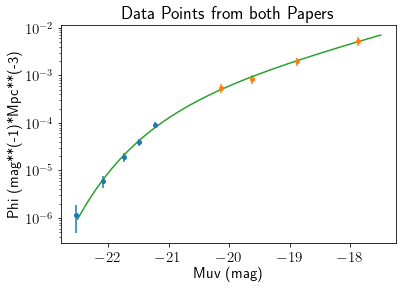

In [17]:
#Make a code to plot Schiter graph

Mmodel = np.linspace(-22.5,-17.5,300)
Pmodel1 = Phi_SF(Mmodel, 5.7e-4, -20.77, -1.88)
ax = plt.subplot()
ax.set_yscale("log")
plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3)')
plt.yscale('log')
plt.title('Data Points from both Papers')
plt.errorbar(muv1, phi1, error1, fmt="o", ms=4)
plt.errorbar(muv2, phi2, error2, fmt="o", ms=4)
plt.plot(Mmodel,Pmodel1)
plt.show()

In [18]:
#Function parameter of LF

def Phi_LF(M, phi_star,M_star,alpha,beta):
    return (phi_star)/(10**(0.4*(alpha+1)*(M-M_star))+10**(0.4*(beta+1)*(M-M_star)))

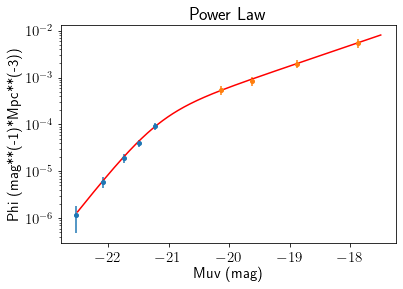

In [19]:
#Double power law

Mmodel = np.linspace(-22.5,-17.5,300)
Pmodel2 = Phi_LF(Mmodel, 1.9e-4, -21.20, -2.10, -5.1)
ax = plt.subplot()
ax.set_yscale("log")
plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.title('Power Law')
plt.errorbar(muv1, phi1, error1, fmt="o",ms=4)
plt.errorbar(muv2, phi2, error2, fmt="o",ms=4)
plt.plot(Mmodel, Pmodel2, color="red")
plt.show()

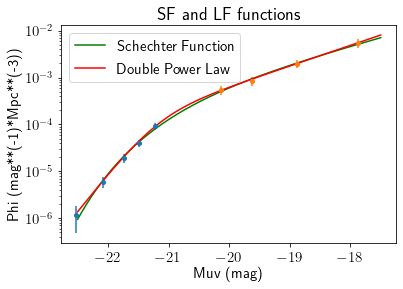

In [20]:
#Combine SF and LF

Mmodel = np.linspace(-22.5,-17.5,300)
Pmodel1 = Phi_SF(Mmodel, 5.7e-4, -20.77, -1.88)
Pmodel2 = Phi_LF(Mmodel, 1.9e-4, -21.20, -2.10, -5.1)
ax = plt.subplot()
ax.set_yscale("log")
plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.title('SF and LF functions')
plt.errorbar(muv1, phi1, error1,fmt="o",ms=4)
plt.errorbar(muv2, phi2, error2, fmt="o",ms=4)
plt.plot(Mmodel, Pmodel1, color="green", label="Schechter Function")
plt.plot(Mmodel, Pmodel2, color="red", label="Double Power Law")
plt.legend()
plt.show()

In [21]:
#Chisquares and lnprob for both functions

parr1 = (5.7e-4, -20.77, -1.88)
parr2 = (1.9e-4, -21.20, -2.10, -5.1)

data = np.concatenate((data1, data2))

def chisq1(parr, dat):
    #Extract parameters from parr
    
    phi_star = parr[0]
    m_star = parr[1]
    alpha = parr[2]
    #Compute the model at the x-values of the data
    
    Pmodel1 = Phi_SF(dat[:,0], phi_star, m_star, alpha)
    #Compute chisq and return
    
    chisq1 = np.sum(((Pmodel1-dat[:,1])**2)/(dat[:,2]**2))
    return chisq1

def lnprob1(parr, dat):
    return -0.5*chisq1(parr, dat)

def chisq2(parr, dat):
    #Extract parameters from parr
    
    phi_star = parr[0]
    m_star = parr[1]
    alpha = parr[2]
    beta = parr[3]
    #Compute the model at the x-values of the data
    
    Pmodel2 = Phi_LF(dat[:,0], phi_star, m_star, alpha, beta)
    #Compute chisq and return
    
    chisq2 = np.sum(((Pmodel2-dat[:,1])**2)/(dat[:,2]**2))
    return chisq2

def lnprob2(parr, dat):
    return -0.5*chisq2(parr, dat)

burn-in run
main run


C:\Users\Viktor\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Viktor\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


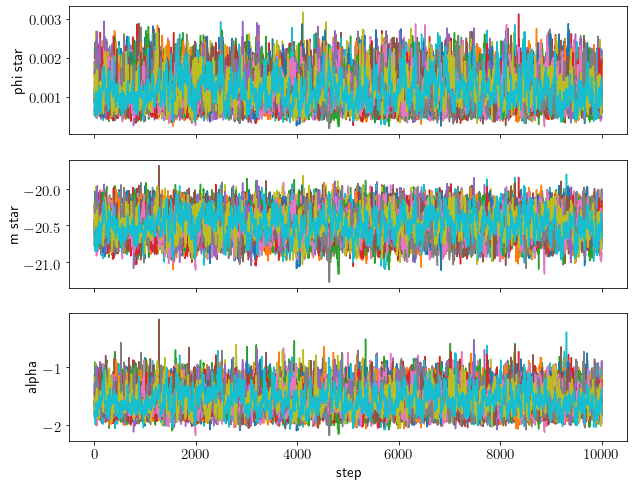

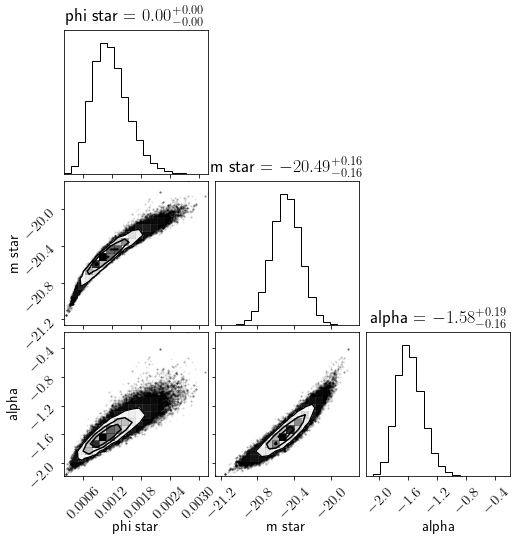

In [22]:
#Setting up mcmc for the Schechter Function

ndim1 = 3
nwalk = 30
nburn = 4000
nmain = 10000

#List of parameter names, for corner()

plab = ['phi star','m star','alpha']

#Setup walkers by perturbing p0

p0 = np.array([5.7e-4,-20.77,-1.88])
pstart = np.array([p0 + 1.0e-9*np.random.normal(size=ndim1) for i in range(nwalk)])

#Setup the sampler

sampler1 = emcee.EnsembleSampler(nwalk,ndim1,lnprob1,args=(data,))

#Burn-in run

print('burn-in run')
pos,prob,state = sampler1.run_mcmc(pstart,nburn)

#Main run

print('main run')
sampler1.reset()
res = sampler1.run_mcmc(pos,nmain)

#Process

samples1 = sampler1.get_chain(flat=True)

#Plot the chains as a way to check for convergence

f,ax = plt.subplots(ndim1,1,figsize=(10,8),sharex=True)
for idim in range(ndim1):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler1.chain[iwalk,:,idim])
    ax[idim].set_ylabel(plab[idim])
ax[-1].set_xlabel('step')
f.show()

#Corner plot

f = corner.corner(samples1,show_titles=True,labels=plab)
f.show()

burn-in run
main run


C:\Users\Viktor\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Viktor\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


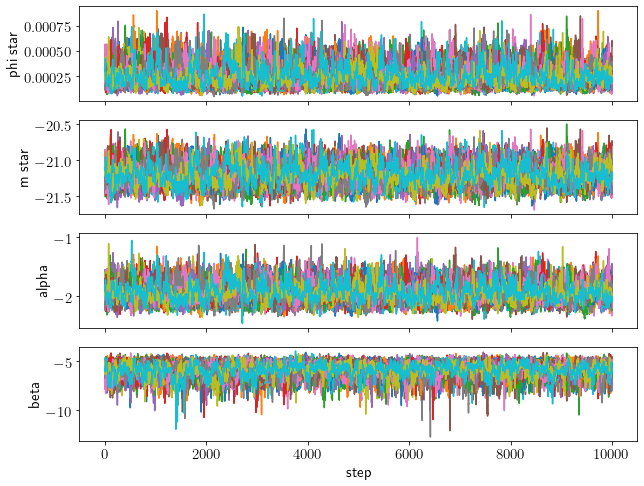

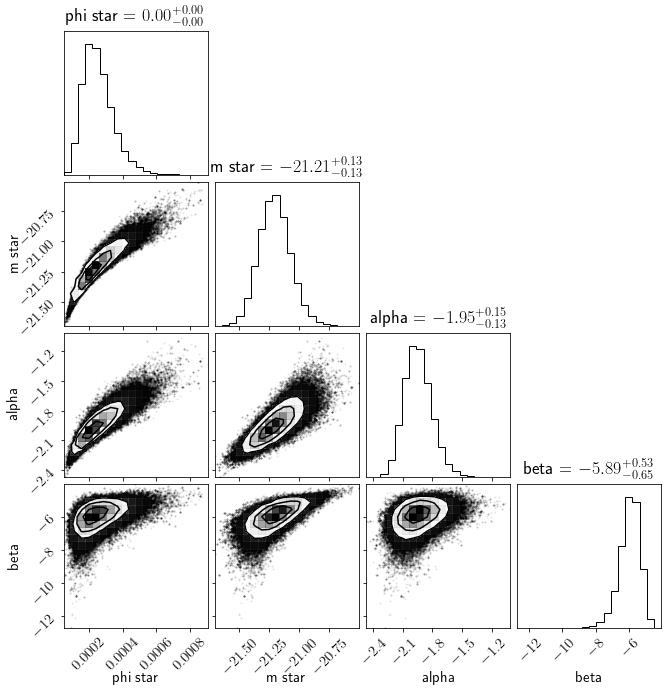

In [23]:
#Setting up mcmc for the Double Power Law

ndim2 = 4
nwalk = 30
nburn = 4000
nmain = 10000

#list of parameter names, for corner()

plab = ['phi star','m star','alpha','beta']

#Setup walkers by perturbing p0

p0 = np.array([1.9e-4,-21.20,-2.10,-5.1])
pstart = np.array([p0 + 1.0e-9*np.random.normal(size=ndim2) for i in range(nwalk)])

#Setup the sampler

sampler2 = emcee.EnsembleSampler(nwalk,ndim2,lnprob2,args=(data,))

#Burn-in run

print('burn-in run')
pos,prob,state = sampler2.run_mcmc(pstart,nburn)

#Main run

print('main run')
sampler2.reset()
res = sampler2.run_mcmc(pos,nmain)

#Process

samples2 = sampler2.get_chain(flat=True)

#Plot the chains as a way to check for convergence

f,ax = plt.subplots(ndim2,1,figsize=(10,8),sharex=True)
for idim in range(ndim2):
    for iwalk in range(nwalk):
        ax[idim].plot(sampler2.chain[iwalk,:,idim])
    ax[idim].set_ylabel(plab[idim])
ax[-1].set_xlabel('step')
f.show()

#Corner plot

f = corner.corner(samples2,show_titles=True,labels=plab)
f.show()

model: [ 1.14554506e-03 -2.04567043e+01 -1.50678300e+00]
model: [ 1.22588460e-03 -2.04768590e+01 -1.62295593e+00]
model: [ 1.24685971e-03 -2.04162581e+01 -1.51877095e+00]


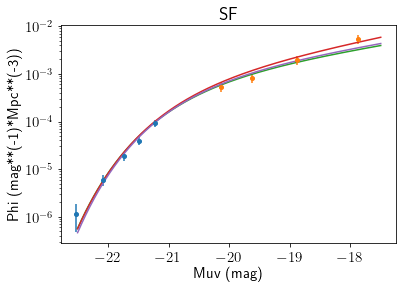

model: [ 2.58538261e-04 -2.12004779e+01 -1.89261467e+00 -5.53255303e+00]
model: [ 2.68171845e-04 -2.11492849e+01 -1.91373605e+00 -6.07031510e+00]
model: [ 2.28646393e-04 -2.12138125e+01 -1.96189108e+00 -5.53809867e+00]


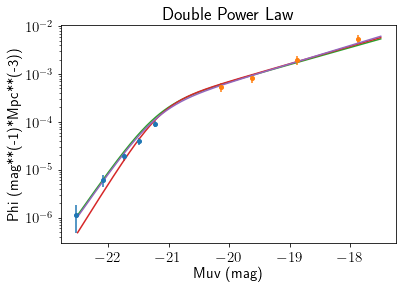

In [24]:
#Fitting 3 samples of just the Schechter Function
#The set of x values where we will evaluate the model

Mmodel = np.linspace(-22.5,-17.5,300)

plt.figure()
plt.errorbar(muv1,phi1,error1,fmt="o",ms=4)
plt.errorbar(muv2,phi2,error2,fmt="o",ms=4)

#Pick a random set of 3 models from the samples

nmodels1 = len(samples1)
indx1 = np.random.randint(low=0,high=nmodels1,size=3)

#Plot the selected models

for i in indx1:
    print('model:',samples1[i])
    Pmodel1 = Phi_SF(Mmodel,samples1[i,0],samples1[i,1],samples1[i,2])
    plt.plot(Mmodel,Pmodel1)

plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.title('SF')
plt.yscale('log')
plt.show()


#Fitting 3 samples of just the Double Power law
#The set of x values where we will evaluate the model

plt.figure()
plt.errorbar(muv1,phi1,error1,fmt="o",ms=4)
plt.errorbar(muv2,phi2,error2,fmt="o",ms=4)

#Pick a random set of 3 models from the samples

nmodels2 = len(samples2)
indx2 = np.random.randint(low=0,high=nmodels2,size=3)

#Plot the selected models

for j in indx2:
    print('model:',samples2[j])
    Pmodel2 = Phi_LF(Mmodel,samples2[j,0],samples2[j,1],samples2[j,2],samples2[j,3])
    plt.plot(Mmodel,Pmodel2)

plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.yscale('log')
plt.title('Double Power Law')
plt.show()

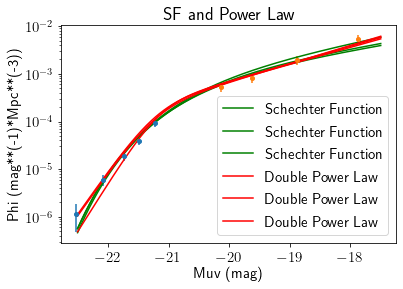

In [26]:
#Both functions plotted together for a final fit using mcmc

Mmodel = np.linspace(-22.5,-17.5,300)

plt.figure()
plt.errorbar(muv1,phi1,error1,fmt="o",ms=4)
plt.errorbar(muv2,phi2,error2,fmt="o",ms=4)

for i in indx1:
    Pmodel1 = Phi_SF(Mmodel,samples1[i,0],samples1[i,1],samples1[i,2])
    plt.plot(Mmodel,Pmodel1,color="green",label="Schechter Function")
    
for j in indx2:
    Pmodel2 = Phi_LF(Mmodel,samples2[j,0],samples2[j,1],samples2[j,2],samples2[j,3])
    plt.plot(Mmodel,Pmodel2,color="red",label="Double Power Law")
    
plt.xlabel('Muv (mag)')
plt.ylabel('Phi (mag**(-1)*Mpc**(-3))')
plt.yscale('log')
plt.title('SF and Power Law')
plt.legend()
plt.show()

Sum all in. There are potentially two major errors. Error number 1 is due to sample size. If we increase sample size our graph may change: however, it should not change dramatically. On other hand, we have computational errors and "assumptions" made by Python during ploting chisq and this could be problematic. It is problematic because our mean may change as more data comes through. Also, small sample size can and will increase other errors during the process. Unfortunatelly, our error for alpha and beta is pretty big and personally. I am not satisfied with that. +-0.52 or +-0.15 relative to our mean is too high to be called complite. Therefore, more sample should be collected and more research must be done